In [1]:
import os
from tqdm import tqdm
from glob import glob

## task 1 데이터 개수

In [ ]:
p = "./sub-task1/Dataset/Train/*/*"
img_list = glob(p)

class_num_dict = {}
for path in img_list : 
    class_name = path.split("\\")[1]
    
    if class_name in class_num_dict.keys() :
        class_num_dict[class_name] += 1
    else :
        class_num_dict[class_name] = 1
display(class_num_dict)
print("total : " , sum(list(class_num_dict.values())))

## task 2 데이터 개수

In [ ]:
p = "./sub-task2/Dataset/Train/*/*"
img_list = glob(p)

class_num_dict = {}
for path in img_list : 
    class_name = path.split("\\")[1]
    
    if class_name in class_num_dict.keys() :
        class_num_dict[class_name] += 1
    else :
        class_num_dict[class_name] = 1
display(class_num_dict)
print("total : " , sum(list(class_num_dict.values())))

## task 1 클래스 종류 및 개수

In [ ]:
import pandas as pd 
p = "./sub-task1/Dataset/info_etri20_emotion_train.csv"
df = pd.read_csv(p)
print("daliy\n")
print(df['Daily'].value_counts().sort_values())
print("Gender\n")
print(df['Gender'].value_counts().sort_values())
print("Embellishment\n")
print(df['Embellishment'].value_counts().sort_values())

# df.head

## task 2 클래스 종류 및 개수

In [ ]:
import pandas as pd 
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)
print("Color\n")
print(df['Color'].value_counts().sort_values())
print(sorted(list(df['Color'].value_counts().keys())))

## 태그, 컬러 별 이미지 시각화

In [ ]:
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import random

# root_path = "./sub-task1/Dataset/Train"
root_path = "./sub-task2/Dataset/Train"
# p = "./sub-task1/Dataset/info_etri20_emotion_train.csv"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)
w, h = 6, 6
f, axs = plt.subplots(h, w, figsize=(20, 20))

tag='Color'
level = 16

ax = axs.flatten()

for i in range(w*h) :
    idx = random.randint(0, len(df['image_name'][df[tag] == level]) - 1)
    ax[i].imshow(cv2.cvtColor(cv2.imread(os.path.join(root_path, df['image_name'][df[tag] == level].iloc[idx])), cv2.COLOR_BGR2RGB))

plt.show()

## task 2 bbox 크기 분포 확인

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)
bbox_w = list(map(lambda x: x['BBox_xmax'] - x['BBox_xmin'], df.iloc))
bbox_h = list(map(lambda x: x['BBox_ymax'] - x['BBox_ymin'], df.iloc))

f, axs = plt.subplots(1, 2, figsize=(40, 10))
ax = axs.flatten()

ax[0].hist(bbox_w, bins=int(len(bbox_w)/10))
ax[0].set_title("bbox width")
ax[1].hist(bbox_h, bins=int(len(bbox_h)/10))
ax[1].set_title("bbox height")

plt.show()

print("bbox width 총 개수 : ", len(bbox_w))
print("bbox width 중복 제거 개수 : ", len(list(set(bbox_w))))
print("bbox width 최대 길이 : ", max(bbox_w))
print("bbox width 최소 길이 : ", min(bbox_w))

print("\nbbox height 총 개수 : ", len(bbox_h))
print("bbox height 중복 제거 개수 : ", len(list(set(bbox_h))))
print("bbox height 최대 길이 : ", max(bbox_h))
print("bbox height 최소 길이 : ", min(bbox_w))

## task 2 bbox 100px ~ 2000px 시각화

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)

size_dict = {}
for df_item in df.iloc :
    w = df_item['BBox_xmax'] - df_item["BBox_xmin"]
    h = df_item['BBox_ymax'] - df_item["BBox_ymin"]
        
    for i in range(100, 2000, 100):
        if (w > i and i+100 > w) or (h > i and i+100 > h) :
            if f"{i}_{i+100}" not in size_dict.keys():
                size_dict[f"{i}_{i+100}"] = dict(df_item)
                break

size_dict = {k : v for k, v in sorted(size_dict.items(), key=lambda x: int(x[0].split("_")[0]))}
f, axs = plt.subplots(5, 4, figsize=(20, 35))
ax = axs.flatten()

for idx, (size, vs) in enumerate(size_dict.items()) :
    img = Image.open(os.path.join(root_path, vs['image_name']))
    cropped_img = img.crop((vs["BBox_xmin"], vs["BBox_ymin"], vs["BBox_xmax"], vs["BBox_ymax"]))
    w = vs["BBox_xmax"] - vs["BBox_xmin"]
    h = vs["BBox_ymax"] - vs["BBox_ymin"]
    fn = vs['image_name']
    title = f"Size : {size}\nWdith : {w} - Height : {h}\nOri : {img.size}\nName : {fn}"
    
    ax[idx].set_title(title)
    ax[idx].imshow(cropped_img)
        


## Class 별 컬러 히스토그램

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)

class_num = len(set(df['Color']))
f, ax = plt.subplots(class_num, 2, figsize=(30, 80))
# ax = axs.flatten()
# color_dict = {}
for i in range(class_num) :
    color_df =df[df['Color'] == i]
    total_r, total_g, total_b = [0]*256, [0]*256, [0]*256
    for cdf in tqdm(color_df.iloc) :
        
        img = Image.open(os.path.join(root_path, cdf["image_name"])).convert("RGB")
        cropped_img = img.crop((cdf["BBox_xmin"], cdf["BBox_ymin"], cdf["BBox_xmax"], cdf["BBox_ymax"]))
        try: 
            rs, gs, bs = cropped_img.split()
        except :
            print(cropped_img)
            continue
        
        for idx, (r, g, b) in enumerate(zip(rs.histogram(), gs.histogram(), bs.histogram())) :
            total_r[idx] += r
            total_g[idx] += g
            total_b[idx] += b
            
    ax[i][0].plot(total_r, color="r")
    ax[i][0].plot(total_g, color="g")
    ax[i][0].plot(total_b, color="b")
    ax[i][0].set_title(f"Label = {i}")
    ax[i][1].imshow(cropped_img)
    
#     total_rc, total_gc, total_bc = 0, 0, 0
#     for idx, (rc, gc, bc) in enumerate(zip(total_r, total_g, total_b)) :
#         total_rc += idx * (rc )#/ max(total_r))
#         total_gc += idx * (gc )#/ max(total_g))
#         total_bc += idx * (bc )#/ max(total_b))
    
#     color_dict[str(i)] = {
#         "r" : total_rc/sum(total_r)/255,
#         "g" : total_gc/sum(total_g)/255,
#         "b" : total_bc/sum(total_b)/255
#     }
# display(color_dict)
plt.show()


## 색상 별 Mean, Std 값

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from copy import deepcopy

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)
mean_dict = {
    "class" : [], 
    "r" : [],
    "g" : [],
    "b" : []}
std_dict = deepcopy(mean_dict)

for i in range(class_num) :
    color_df =df[df['Color'] == i]
    color_mean, color_std = np.zeros(3), np.zeros(3)
    for cdf in tqdm(color_df.iloc) :
        img = cv2.imread(os.path.join(root_path, cdf["image_name"]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img[cdf["BBox_ymin"]:cdf["BBox_ymax"], cdf["BBox_xmin"]:cdf["BBox_xmax"], :]
        
        for idx in range(3) :
            color_mean[idx] += img[:, :, idx].mean()
            color_std[idx] += img[:, :, idx].std()
    
    mean_dict["class"].append(i)
    mean_dict["r"].append(color_mean[0].tolist() / len(color_df) / 255)
    mean_dict["g"].append(color_mean[1].tolist() / len(color_df) / 255)
    mean_dict["b"].append(color_mean[2].tolist() / len(color_df) / 255)
    
    std_dict["class"].append(i)
    std_dict["r"].append(color_std[0].tolist() / len(color_df) / 255)
    std_dict["g"].append(color_std[1].tolist() / len(color_df) / 255)
    std_dict["b"].append(color_std[2].tolist() / len(color_df) / 255)
    
mean_df = pd.DataFrame(mean_dict)
std_df = pd.DataFrame(std_dict)

mean_df.to_csv("./sub-task2/color_mean.csv", index=False)
std_df.to_csv("./sub-task2/color_std.csv", index=False)

## Center crop - 색상 별 RGB 분포
- bbox crop 후 width 의 0.25 ~ 0.75 지점
- bbox crop 후 height 의 0.25 ~ 0.75 지점

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)

class_num = len(set(df['Color']))
f, ax = plt.subplots(class_num, 2, figsize=(30, 80))
# ax = axs.flatten()
# color_dict = {}

for i in range(class_num) :
    color_df =df[df['Color'] == i]
    total_r, total_g, total_b = [0]*256, [0]*256, [0]*256
    for cdf in tqdm(color_df.iloc) :
        
        img = Image.open(os.path.join(root_path, cdf["image_name"])).convert("RGB")
        img = img.crop((cdf["BBox_xmin"], cdf["BBox_ymin"], cdf["BBox_xmax"], cdf["BBox_ymax"]))
        w, h = img.size
        cropped_img = img.crop((int(w*0.25), int(h*0.25), int(w*0.75), int(h*0.75)))
        try: 
            rs, gs, bs = cropped_img.split()
        except :
            print(cropped_img)
            continue
        
        for idx, (r, g, b) in enumerate(zip(rs.histogram(), gs.histogram(), bs.histogram())) :
            total_r[idx] += r
            total_g[idx] += g
            total_b[idx] += b
            
    ax[i][0].plot(total_r, color="r")
    ax[i][0].plot(total_g, color="g")
    ax[i][0].plot(total_b, color="b")
    ax[i][0].set_title(f"Label = {i}")
    ax[i][1].imshow(cropped_img)
    
#     total_rc, total_gc, total_bc = 0, 0, 0
#     for idx, (rc, gc, bc) in enumerate(zip(total_r, total_g, total_b)) :
#         total_rc += idx * (rc )#/ max(total_r))
#         total_gc += idx * (gc )#/ max(total_g))
#         total_bc += idx * (bc )#/ max(total_b))
    
#     color_dict[str(i)] = {
#         "r" : total_rc/sum(total_r)/255,
#         "g" : total_gc/sum(total_g)/255,
#         "b" : total_bc/sum(total_b)/255
#     }
# display(color_dict)
plt.show()


## Center crop - 색상 별 Mena, Std 값

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from copy import deepcopy

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)
mean_dict = {
    "class" : [], 
    "r" : [],
    "g" : [],
    "b" : []}
std_dict = deepcopy(mean_dict)

for i in range(class_num) :
    color_df =df[df['Color'] == i]
    color_mean, color_std = np.zeros(3), np.zeros(3)
    for cdf in tqdm(color_df.iloc) :
        img = cv2.imread(os.path.join(root_path, cdf["image_name"]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img[cdf["BBox_ymin"]:cdf["BBox_ymax"], cdf["BBox_xmin"]:cdf["BBox_xmax"], :]
        h, w = img.shape[:2]
        img = img[int(h*0.25):int(h*0.75), int(w*0.25):int(w*0.75), :]
        
        for idx in range(3) :
            color_mean[idx] += img[:, :, idx].mean()
            color_std[idx] += img[:, :, idx].std()
    
    mean_dict["class"].append(i)
    mean_dict["r"].append(color_mean[0].tolist() / len(color_df) / 255)
    mean_dict["g"].append(color_mean[1].tolist() / len(color_df) / 255)
    mean_dict["b"].append(color_mean[2].tolist() / len(color_df) / 255)
    
    std_dict["class"].append(i)
    std_dict["r"].append(color_std[0].tolist() / len(color_df) / 255)
    std_dict["g"].append(color_std[1].tolist() / len(color_df) / 255)
    std_dict["b"].append(color_std[2].tolist() / len(color_df) / 255)
    
mean_df = pd.DataFrame(mean_dict)
std_df = pd.DataFrame(std_dict)

mean_df.to_csv("./sub-task2/centercrop_color_mean.csv", index=False)
std_df.to_csv("./sub-task2/centercrop_color_std.csv", index=False)

## Image Offline Augmentation
- 1, 2, 8, 9 번 label에 대해서만 진행

In [2]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)

In [12]:
type(df["Color"][0])

numpy.int64

In [21]:
np.random.seed(2455)

df_save_path = "./sub-task2/Dataset/aug_info_etri20_color_train.csv"
    
labels = [1, 2, 8, 9]
aug_num = 300
patch_size = 3
patch_offset = [[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2,2]]
aug_img_list = []
aug_df_dict = {k:[] for k in df.keys()}

for label in labels :
    label_df = df[df['Color'] == label]
    aug_iter = aug_num // len(label_df) * len(label_df)
    
    save_root_path = os.path.join(root_path, str(label))
    os.makedirs(save_root_path, exist_ok=True)
    for cnt in tqdm(range(aug_iter)) :
        save_img_path = os.path.join(save_root_path, f"{cnt}.jpg")
        pick = np.random.choice(len(label_df), patch_size**2, replace=False)
        sampled_label_df = label_df.iloc[pick]
        smapled_patch_idx = np.random.choice(patch_size**2, patch_size**2, replace=False)

        w = np.random.randint(250, 375, size=1).item()
        crop_w = np.linspace(0, w, patch_size + 1, endpoint=True, dtype=np.int32)
        h = np.random.randint(250, 600, size=1).item()
        crop_h = np.linspace(0, h, patch_size + 1, endpoint=True, dtype=np.int32)

        aug_img = np.zeros((h, w, 3), dtype=np.uint8)

        # f, ax = plt.subplots(3, 3, figsize=(10, 10))
        # ax = ax.flatten()

        for i, (_df, pidx) in enumerate(zip(sampled_label_df.iloc, smapled_patch_idx)) :    
            img_path = os.path.join(root_path, _df["image_name"])
            
            img = cv2.imread(img_path)
            img = img[_df["BBox_ymin"]:_df["BBox_ymax"], _df["BBox_xmin"]:_df["BBox_xmax"], :]
            img = cv2.resize(img, (w, h))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            x, y = patch_offset[pidx]
            aug_img[crop_h[y]:crop_h[y+1], crop_w[x]:crop_w[x+1], :] = img[crop_h[y]:crop_h[y+1], crop_w[x]:crop_w[x+1], :]

            
        #     ax[i].imshow(aug_img)
        #     ax[i].set_title(_df['image_name'])

        # plt.show()
        cv2.imwrite(save_img_path, aug_img)
        aug_df_dict["image_name"].append(f"{label}/{cnt}.jpg")
        aug_df_dict["BBox_xmin"].append(1)
        aug_df_dict["BBox_ymin"].append(1)
        aug_df_dict["BBox_xmax"].append(w-1)
        aug_df_dict["BBox_ymax"].append(h-1)
        aug_df_dict["Color"].append(label)
        
new_df = pd.concat([df, pd.DataFrame(aug_df_dict)], ignore_index = True)
new_df.to_csv(df_save_path)

100%|██████████| 258/258 [00:21<00:00, 12.17it/s]


## code test

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

root_path = "./sub-task2/Dataset/train"
p = "./sub-task2/Dataset/info_etri20_color_train.csv"
df = pd.read_csv(p)
cdf = df.iloc[2255]

img = Image.open(os.path.join(root_path, cdf['image_name'])).convert('RGB')
label = cdf['Color']
img = img.crop((cdf["BBox_xmin"], cdf["BBox_ymin"], cdf["BBox_xmax"], cdf["BBox_ymax"]))
w, h = img.size
cropped_img = img.crop((int(w*0.25), int(h*0.25), int(w*0.75), int(h*0.75)))
display(img)
display(cropped_img)
print(label)

In [9]:
from test._18color_classification import BaseMain

cfg = {
        "mode" : "infer", #train, #infer
        
        "model_name" : "tf_efficientnetv2_s.in21k", #"tf_efficientnetv2_m.in21k", #"swinv2_base_window12to16_192to256_22kft1k",
        #"tf_efficientnetv2_s.in21k",#"eva_large_patch14_196.in22k_ft_in1k",#"beit_base_patch16_224.in22k_ft_in22k",
        "num_classes" : 18,
        
        "learning_rate" : 1e-4,
        "focal_alpha" : 2,
        "focal_gamma" : 2,
        "resize" : 224,
        
        "data_train_path" : "./sub-task2/Dataset/Train",
        "data_train_csv_path" : "./sub-task2/Dataset/info_etri20_color_train.csv",
        "data_valid_path" : "./sub-task2/Dataset/Validation",
        "data_valid_csv_path" : "./sub-task2/Dataset/info_etri20_color_validation.csv",
        
        "data_infer_path" : "/aif/Dataset/Test/",
        "data_infer_csv_path" : "/aif/Dataset/info_etri20_color_test.csv",
        # "data_infer_path" : "./sub-task2/Dataset/Test_sample",
        # "data_infer_csv_path" : "./sub-task2/Dataset/info_etri20_color_test_sample.csv",
        
        "epochs" : 80,
        "batch_size" : 32,
        "num_worker" : 4,
        "early_stop_patient" : 10,
        
        "reuse" : False, #True, #False
        "weight_path" : "./sub-task2/ckpt/tf_efficientnetv2_s.in21k/18color_normal_classification/11E-val0.585818040998962-tf_efficientnetv2_s.in21k.pth",
        
        "save_path" : "./sub-task2/ckpt/tf_efficientnetv2_s.in21k/18color_normal_classification",
        "output_path" : "./sub-task2/output/tf_efficientnetv2_s.in21k/18color_normal_classification",
        "log_path" : "./sub-task2/logging/18color_normal_classification",
        "device" : "cuda",
        
        "binary_mode" : False,
        
        "note" : "Cutmix 사용, FocalLoss 사용, Adam Optim 사용"
    } 

cfg["shuffle"] = False

base_main = BaseMain(**cfg)

base_main.infer(**cfg)

ModuleNotFoundError: No module named 'test._18color_classification'

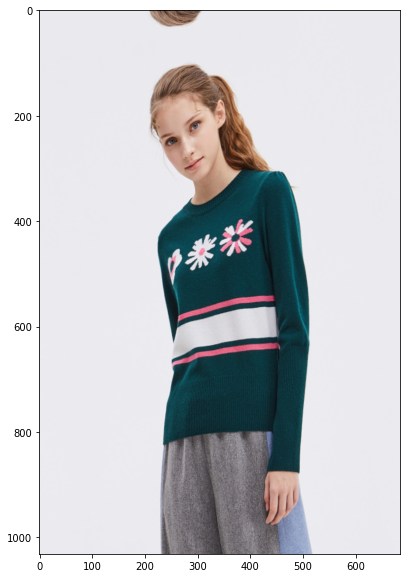

In [412]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

t = A.Compose([
    
    # A.GridDistortion(always_apply=True)
    # A.OpticalDistortion(p=1, border_mode=3,
    #                     distort_limit=5, shift_limit=1), #>>   
    # A.GridDistortion(p=1, 
    #                     always_apply=False, 
    #                     num_steps=1, 
    #                     distort_limit=(0, 5), 
    #                     interpolation=2, 
    #                     border_mode=3, 
    #                     value=(0, 0, 0), 
    #                     mask_value=None), #>>
    A.ElasticTransform(p=1, 
                    alpha=250, sigma=250 * 0.25, alpha_affine=250 * 0.25), #>>
    # A.Perspective(scale=(0.05, 0.1), keep_size=True, p=1)
    # A.Equalize(by_channels=False,p=1),        
    # A.Spatter(intensity=0.2, p=1)
    # A.Emboss(p=1),
    # A.Sharpen(p=1), A.FancyPCA(p=1)
    # A.Affine(p=1, fit_output=True, mask_interpolation=1, mode=1)
    # A.Affine(p=1, rotate=(-180, 180), fit_output=False, mask_interpolation=1, mode=3) #>>
    # A.GlassBlur(sigma=1, max_delta=5,p=1) #>>
    # A.Blur(15, p=1)
    # A.RandomBrightnessContrast(brightness_limit=(-0.4, 0.4), brightness_by_max=False,p=1),
    # A.Posterize(num_bits=4, p=1)
    # A.RandomSunFlare(src_radius=50, p=1)
    # A.RandomSnow(p=1)
    # A.FancyPCA(p=1),
    # A.Cutout(num_holes=12, p=1) >> 
    # A.Downscale(scale_min=0.01, scale_max=0.5, p=1) >>
    # A.RandomSnow(p=1)
    # A.RandomRain(slant_lower=-10, slant_upper=10,  brightness_coefficient=1,
    #              drop_color=(50, 50, 50), p=1) >>>
    # A.RandomToneCurve(scale=0.2, p=1)
    # A.RingingOvershoot(blur_limit=(5, 5), p=1)
    # A.Solarize(threshold=220,p=1)
    # A.Superpixels(p=1)
    # A.CoarseDropout(min_holes=24, max_holes=24, max_height=10, min_height=10 ,p=1), >>
    # A.RandomRotate90(p=1)
    # A.RandomGridShuffle(grid=(4,4), p=1)
])

img = cv2.imread("./sub-task2/Dataset/Validation/2KINT/kn0981-1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = t(image=img)["image"]
plt.figure(figsize = (10,10))
plt.imshow(img)

In [419]:
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
a=[5,0,1,2,3,4,3]
b=[5,0,2,5,1,4,3]
# multilabel_confusion_matrix(a,b)
a.ex

array([[[6, 0],
        [0, 1]],

       [[5, 1],
        [1, 0]],

       [[5, 1],
        [1, 0]],

       [[5, 0],
        [1, 1]],

       [[6, 0],
        [0, 1]],

       [[5, 1],
        [0, 1]]], dtype=int64)